In [1]:
import pickle
from covid_simulation import * 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import json
from tqdm import tqdm

In [2]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.animation import FuncAnimation, PillowWriter 
import matplotlib.patches as mpatches

In [12]:
N=10010
data_dir = r'../data/data_3_10010'
G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))

In [13]:
if os.path.exists(os.path.join(data_dir,'familiy_size_per_age.json')): 
    with open(os.path.join(data_dir,'familiy_size_per_age.json'), 'r') as fp:
        familiy_size_per_age=json.load(fp)
else: 
    G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))
    familiy_size_per_age={1:[], 2:[], 3:[], 4:[]}
    for n,y in G.nodes(data=True): 
        age_group=find_age_group(y['age'])
        if 'group' in y: 
            group=y['group']
            familiy_size_per_age[age_group].append(len(select_per_attr(G,'group',group)))
        else: 
            familiy_size_per_age[age_group].append(1)
    with open(os.path.join(data_dir,'familiy_size_per_age.json'), 'w') as fp:
        json.dump(familiy_size_per_age, fp)

In [14]:
def plot_dist_per_age(ax, data, age_group,  **kwargs): 

    xlim= kwargs.get('xlim', [0, 40])
    bins= kwargs.get('bins', 50)

    sns.distplot(data, kde=False, fit=stats.norm, axlabel='# Connections', norm_hist=True, 
    ax=ax, bins=bins)
    (mu, sigma) = stats.norm.fit(data)
    ax.set_title('Age Group: {}'.format(age_group))
    ax.set_xlim(xlim)
    #place a text box in upper left in axes coords
    textstr = "$\mu=${0:.2g}\n $\sigma=${1:.2f})".format(mu, sigma)
    ax.text(0.68, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=1.0))
    ax.locator_params(axis='x', nbins=5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

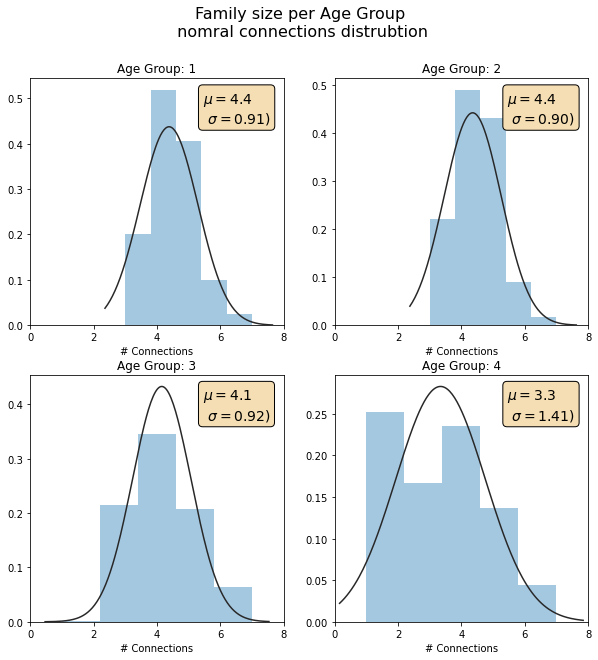

In [11]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], familiy_size_per_age['1'], '1', xlim=[0,8], bins=5)
plot_dist_per_age(axes[0,1], familiy_size_per_age['2'], '2', xlim=[0,8], bins=5)
plot_dist_per_age(axes[1,0], familiy_size_per_age['3'], '3', xlim=[0,8], bins=5)
plot_dist_per_age(axes[1,1], familiy_size_per_age['4'], '4', xlim=[0,8], bins=5)
fig.suptitle('Family size per Age Group\n nomral connections distrubtion', fontsize=16)
plt.savefig(os.path.join(data_dir,'Family size per Age Group - nomral connections distrubtion.eps'), format='eps')
plt.show()

In [15]:
G_list = ['G_aged.p', 'G_equi_aged.p', 'G_aged_eldery_grouped.p']
if os.path.exists(os.path.join(data_dir,'df_dist_by_age.csv')): 
    print('load from file')
    df = pd.read_csv(os.path.join(data_dir,'df_dist_by_age.csv'))
else: 
    df = pd.DataFrame(columns=['age_group', 'state', 'numOfConnections'], dtype='float64')
    G_list = ['G_aged.p', 'G_equi_aged.p', 'G_aged_eldery_grouped.p']
    for k, G_filename in enumerate(G_list): 
        print(G_filename)
        G=nx.read_gpickle(os.path.join(data_dir,G_filename))
        for n,y in G.nodes(data=True): 
            df.loc[n+k*N]= [find_age_group(y['age']), G_filename, len(list(nx.neighbors(G, n)))]
    df.to_csv(os.path.join(data_dir,'df_dist_by_age.csv'))

load from file


In [8]:
df2=df.loc[df['state']==G_list[age_grp]]
df2.head()

,Unnamed: 0,age_group,state,numOfConnections
0,0,3.0,G_aged.p,15.0
1,1,2.0,G_aged.p,13.0
2,2,3.0,G_aged.p,15.0
3,3,2.0,G_aged.p,16.0
4,4,2.0,G_aged.p,16.0


In [16]:
age_grp=0
df2=df.loc[df['state']==G_list[age_grp]]
for group, df_group in df2.groupby('age_group'):
    mu, sigma = (df_group['numOfConnections'].mean(), df_group['numOfConnections'].std())
    print(mu, sigma)

14.3737658674189 2.6562537346421315
14.357142857142858 2.612499229631342
14.093725592293673 2.594578621996733
13.555038759689923 2.456095914301109


14.3737658674189 2.6562537346421315
14.357142857142858 2.612499229631342
14.093725592293673 2.594578621996733
13.555038759689923 2.456095914301109


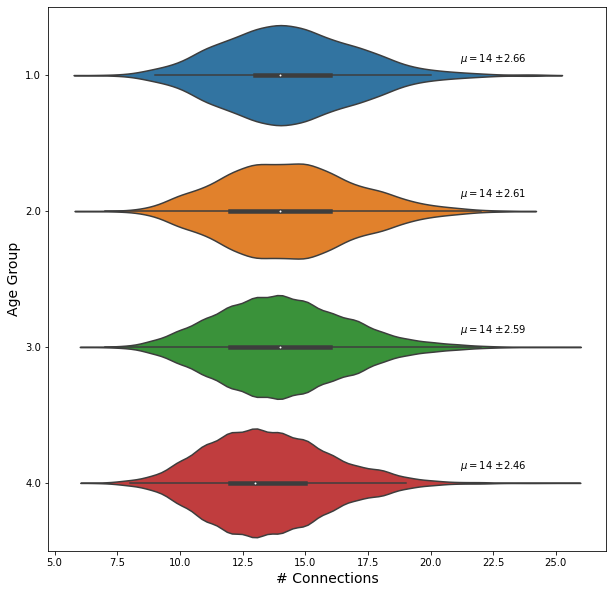

14.358956276445697 4.601577715328854
14.656618610747051 4.4528913540718875
13.921634990887789 3.8761897411558666
13.56279069767442 4.479534898221013


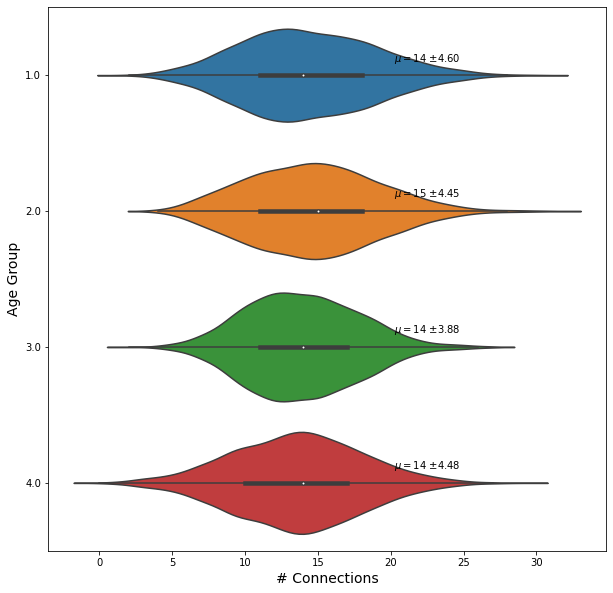

13.989421720733427 2.6672484064986626
13.958060288335517 2.6158803625389737
13.685498568081229 2.5954729353001453
15.61736434108527 3.787706524882993


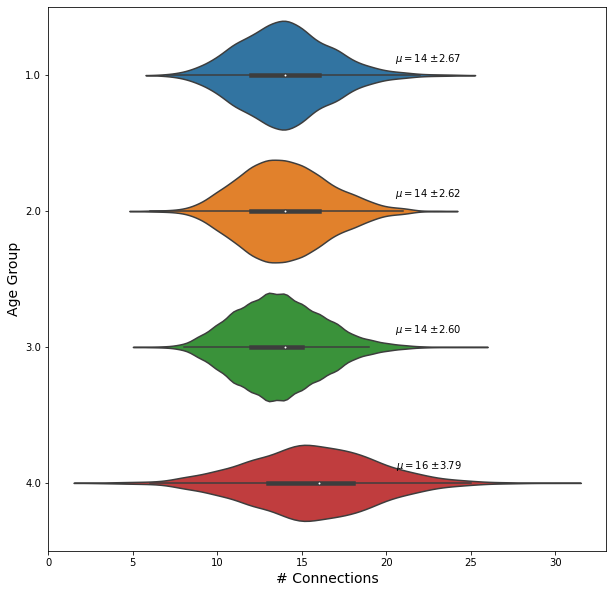

In [17]:
for age_grp in range(3):  

    df2=df.loc[df['state']==G_list[age_grp]]
    for group, df_group in df2.groupby('age_group'):
        mu, sigma = (df_group['numOfConnections'].mean(), df_group['numOfConnections'].std())
        print(mu, sigma)

    plt.figure(figsize=(10,10))
    ax=sns.violinplot(y='age_group', x='numOfConnections',data=df2, orient='h')
    for group,df_group   in df2.groupby('age_group'):
        mu, sigma = (df_group['numOfConnections'].mean(), df_group['numOfConnections'].std())
        textstr = "$\mu=${0:.2g} $\pm ${1:.2f}".format(mu, sigma)
        ax.text(22.5,group-1-0.1,textstr, horizontalalignment='center')  # TODO : update x value for text 
    plt.xlabel('# Connections', fontsize=14)
    plt.ylabel('Age Group', fontsize=14)
    plt.savefig(os.path.join(data_dir,'Dist. by age group - State {}.eps'.format(age_grp)), format='eps')
    plt.savefig(os.path.join(data_dir,'Dist. by age group - State {}.png'.format(age_grp)), format='png')
    plt.show()

# Subset connections

In [14]:
G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


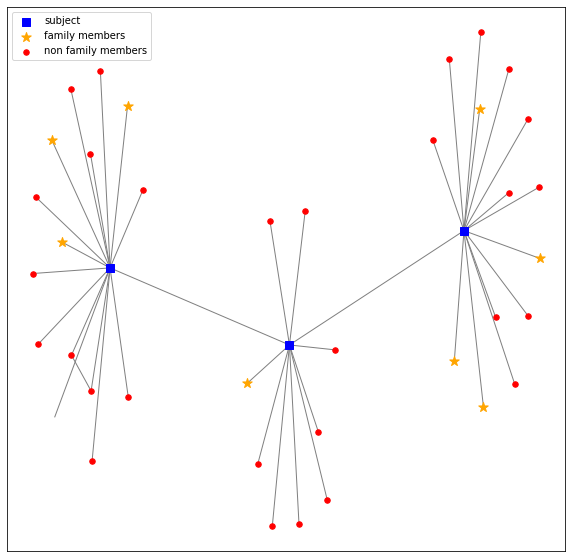

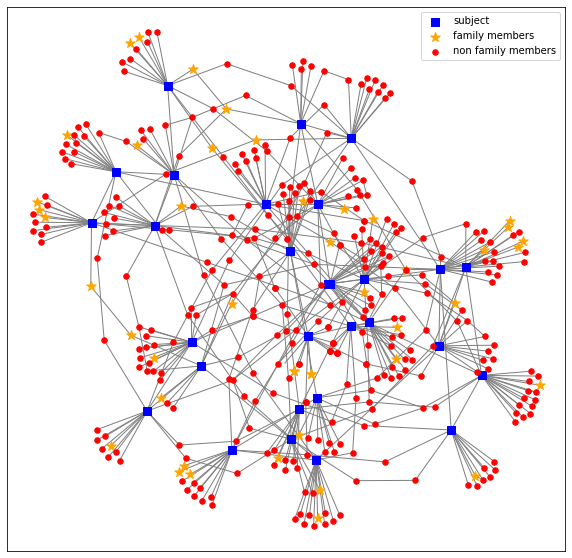

In [15]:
for numOfCon in [3,30]: 
    seeds = [2]
    family_members_list=[]
    non_family_members_list=[]

    for k in range(numOfCon): 
        
        family_members=find_family_members(G,seeds[k])
        non_family_members=find_non_family_members(G,seeds[k])

        seeds.append(np.random.choice(non_family_members))
        family_members_list += family_members
        non_family_members_list += non_family_members

    # exclude seeds from list 
    family_members = [x for x in family_members if x not in seeds]
    non_family_members_list = [x for x in non_family_members_list if x not in seeds]
    node_list = [*seeds,*family_members_list,*non_family_members_list]

    g = G.subgraph(node_list)
    pos=nx.spring_layout(g)

    plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(g,pos, nodelist=seeds[:-1], node_color='blue', node_size=50, node_shape = 's') 
    nx.draw_networkx_nodes(g,pos, nodelist=family_members_list, node_color='orange', node_size=100, node_shape = '*')   
    nx.draw_networkx_nodes(g,pos, nodelist=non_family_members_list, node_color='r', node_size=30)   
    
    nx.draw_networkx_edges(G, pos, edgelist=g.edges(), edge_color='gray')
    plt.legend(['subject', 'family members', 'non family members'])
    plt.savefig(os.path.join(data_dir,'Connections between {} subjects.eps'.format(numOfCon)), format='eps')
    plt.savefig(os.path.join(data_dir,'Connections between {} subjects.png'.format(numOfCon)), format='png')

## Videos

In [16]:
def split_into_age_groups(node_list): 
    result={1:[], 2:[], 3:[], 4:[]}
    for n in node_list: 
        age_group=find_age_group(G.nodes[n]['age'])    
        result[age_group].append(n)
    return result

In [17]:
status_list=   {'S':{'node_color': 'blue','node_size' : 5, 'alpha': 0.5 }, 
                'E':{'node_color': 'orange','node_size' : 50, 'alpha': 1.0 },
                'I':{'node_color': 'red','node_size' : 50, 'alpha': 1.0 },
                'R':{'node_color': 'gray','node_size' : 50, 'alpha': 1.0 },
                'D':{'node_color': 'black','node_size' : 50, 'alpha': 1.0 }}

age_group_node_shape_list = {1:'o',2:'^',3:'s',4:'X'}

In [18]:
stateIdx=1
G=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}_iter_0.p'.format(stateIdx)))
pos=nx.random_layout(G)

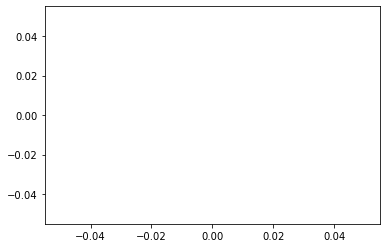

In [19]:

flatten = lambda l: [item for sublist in l for item in sublist]
colors = ['blue', 'orange', 'red', 'gray', 'black']
texts1 = ['Susceptible','Exposed','Infected','Recovered', 'Died']
color_patches=[mpatches.Patch(color=x[0], label=x[1]) for x in zip(colors, texts1)]

markers = ['o','^','s','X', '']
texts2 = ['0-14', '15-34', '35-54', '55+' ,'']

patches1 = [ plt.plot([],[], marker=markers[i], ms=20, ls="", color='black', 
            label="{:s}".format(texts2[i]) )[0]  for i in range(len(texts2)) ]
            
def new_exposed_nodes(G, logStatus, t): 
    edges_list = []
    if t > 0 :  
        status = 'E'
        exposed_node_list=logStatus[t][status]

        addition_exposed_list= [x for x in logStatus[t][status] if 
                        (x not in logStatus[t-1][status]) & (find_age_group(G.nodes[x]['age']) == 4 )]
        addition_exposed_list = [x for x in addition_exposed_list if 'origin' in G.nodes[x]]
        edges_list=set([(G.nodes[x]['origin'][-1], x) for x in addition_exposed_list if G.nodes[x]['origin'][-1] > -1]) 
    return edges_list

def animate(G, logStatus, ax, t, st_list=['S','E','I','R','D'], age_group=False):
    if age_group: 
        for status in st_list: 
            split_node_list = split_into_age_groups(logStatus[t][status])
            for age_k, age_nodes in split_node_list.items(): 

                nx.draw_networkx_nodes(G,pos,
                                        nodelist=age_nodes,
                                        node_shape=age_group_node_shape_list[age_k],
                                        node_color=status_list[status]['node_color'],
                                        node_size=status_list[status]['node_size'],
                                        alpha=status_list[status]['alpha'] ,ax=ax)     
        nx.draw_networkx_edges(G, pos, edgelist=new_exposed_nodes(G,logStatus, t), edge_color='r', alpha = 0.5, ax=ax)

    
    
    else: 
        for k, status in enumerate(st_list): 
            nx.draw_networkx_nodes(G,pos,
                                    nodelist=logStatus[t][status],
                                    node_color=status_list[status]['node_color'],
                                    node_size=status_list[status]['node_size'],
                                    alpha=status_list[status]['alpha'] ,ax=ax)
        nx.draw_networkx_edges(G, pos, edgelist=new_exposed_nodes(G,logStatus, t), edge_color='r', ax=ax)
   

In [20]:

ind= '001'
tmp_png_dir = r'C:\temp\covid\png_'+ind
if not os.path.exists(tmp_png_dir): 
    os.mkdir(tmp_png_dir)

In [21]:
if True: 
    logStatus1 = pickle.load(open(os.path.join(data_dir,'G_logState1_iter_0.p'), 'rb'))
    G1=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState1_iter_0.p'))
    
    stat_list  = ['S', 'E','I','R','D']
    #stat_list = ['E','I','D']
    for t in tqdm(range(150)): 
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
        animate(G1, logStatus1, ax, t,  stat_list, age_group=True)

        ax.set_title('State1', loc='left')

        fig.suptitle('t= {} days'.format(t), fontsize=15)
        plt.legend(handles=flatten(list(map(list, zip(color_patches,patches1)))), bbox_to_anchor=(0.5, 0), 
           loc='center', ncol = 5)

        plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=0.0)
        plt.savefig(tmp_png_dir + r'\Graph_{:04d}.png'.format(t), format="PNG")
        fig.clear()

100%|██████████| 150/150 [01:30<00:00,  1.65it/s]


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [22]:
import cv2
import os

image_folder = tmp_png_dir
video_name=os.path.join(data_dir, 'video_compare_{}.mp4'.format(ind))

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter(video_name, fourcc, 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [23]:

ind= '001_2'
tmp_png_dir = r'C:\temp\covid\png_'+ind
if not os.path.exists(tmp_png_dir): 
    os.mkdir(tmp_png_dir)

In [24]:
if True: 
    logStatus1 = pickle.load(open(os.path.join(data_dir,'G_logState1_iter_0.p'), 'rb'))
    logStatus2 = pickle.load(open(os.path.join(data_dir,'G_logState2_iter_0.p'), 'rb'))
    logStatus3 = pickle.load(open(os.path.join(data_dir,'G_logState3_iter_0.p'), 'rb'))
    logStatus4 = pickle.load(open(os.path.join(data_dir,'G_logState4_iter_0.p'), 'rb'))
    logStatus5 = pickle.load(open(os.path.join(data_dir,'G_logState5_iter_0.p'), 'rb'))
    G1=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState1_iter_0.p'))
    G2=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState2_iter_0.p'))
    G3=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState3_iter_0.p'))
    G4=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState4_iter_0.p'))
    G5=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState5_iter_0.p'))


    stat_list  = ['S', 'E','I','R','D']
    #stat_list = ['E','I','R', 'D']
    for t in tqdm(range(150)): 
        fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10),  sharex='all', sharey='all')
        animate(G1, logStatus1, ax[0,0], t,  stat_list, age_group=True)
        animate(G2, logStatus2, ax[0,1], t,  stat_list, age_group=True)
        animate(G3, logStatus3, ax[1,0], t,  stat_list, age_group=True)
        animate(G4, logStatus4, ax[1,1], t,  stat_list, age_group=True)
        animate(G5, logStatus5, ax[0,2], t,  stat_list, age_group=True)
        ax[0,0].set_title('State1')
        ax[0,1].set_title('State2')
        ax[1,0].set_title('State3')
        ax[1,1].set_title('State4')
        ax[0,2].set_title('State5')
        fig.suptitle('t= {} days'.format(t), fontsize=15)

        plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=0.0)
        fig.legend(handles=flatten(list(map(list, zip(color_patches,patches1)))), 
           bbox_to_anchor=(0.5, 0.05), loc='center', ncol = 5,  prop={'size': 20})
        plt.savefig(tmp_png_dir + r'\Graph_{:04d}.png'.format(t), format="PNG")
        fig.clear()

100%|██████████| 150/150 [06:24<00:00,  2.57s/it]


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [25]:
import cv2
import os

image_folder = tmp_png_dir
video_name=os.path.join(data_dir, 'video_compare_{}.mp4'.format(ind))

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter(video_name, fourcc, 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [26]:
ind= '001_3'
tmp_png_dir = r'C:\temp\covid\png_'+ind
if not os.path.exists(tmp_png_dir): 
    os.mkdir(tmp_png_dir)

In [27]:
if True: 
    logStatus1 = pickle.load(open(os.path.join(data_dir,'G_logState1_iter_0.p'), 'rb'))
    logStatus2 = pickle.load(open(os.path.join(data_dir,'G_logState2_iter_0.p'), 'rb'))
    logStatus3 = pickle.load(open(os.path.join(data_dir,'G_logState3_iter_0.p'), 'rb'))
    logStatus4 = pickle.load(open(os.path.join(data_dir,'G_logState4_iter_0.p'), 'rb'))
    logStatus5 = pickle.load(open(os.path.join(data_dir,'G_logState5_iter_0.p'), 'rb'))
    G1=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState1_iter_0.p'))
    G2=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState2_iter_0.p'))
    G3=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState3_iter_0.p'))
    G4=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState4_iter_0.p'))
    G5=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState5_iter_0.p'))


    #stat_list  = ['S', 'E','I','R','D']
    stat_list = ['E','I','R', 'D']
    for t in tqdm(range(150)): 
        fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10),  sharex='all', sharey='all')
        animate(G1, logStatus1, ax[0,0], t,  stat_list, age_group=True)
        animate(G2, logStatus2, ax[0,1], t,  stat_list, age_group=True)
        animate(G3, logStatus3, ax[1,0], t,  stat_list, age_group=True)
        animate(G4, logStatus4, ax[1,1], t,  stat_list, age_group=True)
        animate(G5, logStatus5, ax[0,2], t,  stat_list, age_group=True)
        ax[0,0].set_title('State1')
        ax[0,1].set_title('State2')
        ax[1,0].set_title('State3')
        ax[1,1].set_title('State4')
        ax[0,2].set_title('State5')
        fig.suptitle('t= {} days'.format(t), fontsize=15)

        plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=0.0)
        fig.legend(handles=flatten(list(map(list, zip(color_patches,patches1)))), 
           bbox_to_anchor=(0.5, 0.05), loc='center', ncol = 5,  prop={'size': 20})
        plt.savefig(tmp_png_dir + r'\Graph_{:04d}.png'.format(t), format="PNG")
        fig.clear()

100%|██████████| 150/150 [04:30<00:00,  1.80s/it]


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [28]:
import cv2
import os

image_folder = tmp_png_dir
video_name=os.path.join(data_dir, 'video_compare_{}.mp4'.format(ind))

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter(video_name, fourcc, 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()